In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 第6章

##表

In [2]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

In [3]:
# 3列3行のデータを作成し、インデックスとカラムを設定
hier_df= DataFrame(
    np.arange(9).reshape((3,3)),
    index = [
        ['a','a','b'],
        [1,2,2]
    ],
    columns = [
        ['Osaka','Tokyo','Osaka'],
        ['Blue','Red','Red']
    ]
)
hier_df

Osaka Tokyo Osaka
     Blue   Red   Red
a 1     0     1     2
  2     3     4     5
b 2     6     7     8

In [4]:
# indexに名前を付ける
hier_df.index.names =['key1','key2']
# カラムに名前を付ける
hier_df.columns.names =['city','color']
hier_df

city      Osaka Tokyo Osaka
color      Blue   Red   Red
key1 key2                  
a    1        0     1     2
     2        3     4     5
b    2        6     7     8

In [5]:
hier_df['Osaka']

color      Blue  Red
key1 key2           
a    1        0    2
     2        3    5
b    2        6    8

In [6]:
# 階層ごとの要約統計量：行合計
hier_df.sum(level = 'key2', axis = 0)

<ipython-input-6-7405571c2c09>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  hier_df.sum(level = 'key2', axis = 0)


city,Osaka,Tokyo,Osaka
color,Blue,Red,Red
key2,,,
1,0,1,2
2,9,11,13


In [7]:
# 列合計
hier_df.sum(level = 'color', axis = 1)

<ipython-input-7-64442d40a735>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  hier_df.sum(level = 'color', axis = 1)


color      Blue  Red
key1 key2           
a    1        0    3
     2        3    9
b    2        6   15

In [ ]:
hier_df.drop(['b'])

city      Osaka Tokyo Osaka
color      Blue   Red   Red
key1 key2                  
a    1        0     1     2
     2        3     4     5

In [ ]:
hier_df1 = DataFrame(
    np.arange(12).reshape((3,4)),
    index = [['c','d','d'],[1,2,1]],
    columns = [
        ['Kyoto','Nagoya','Hokkaido','Kyoto'],
        ['Yellow','Yellow','Red','Blue']
    ]
)

hier_df1.index.names = ['key1','key2']
hier_df1.columns.names = ['city','color']
hier_df1

city       Kyoto Nagoya Hokkaido Kyoto
color     Yellow Yellow      Red  Blue
key1 key2                             
c    1         0      1        2     3
d    2         4      5        6     7
     1         8      9       10    11

## データ

In [ ]:
# データ1の準備
data1 = {
    'id': ['100', '101', '102', '103', '104', '106', '108', '110', '111',' 113'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru','Mitsuo']
}
df1 = DataFrame(data1)
df1

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
5,106,Tokyo,1991,Mituru
6,108,Osaka,1988,Aoi
7,110,Kyoto,1990,Tarou
8,111,Hokkaido,1995,Suguru
9,113,Tokyo,1981,Mitsuo


In [ ]:
# データ2の準備
data2 = {
    'id': ['100', '101', '102', '105', '107'],
    'math': [50, 43, 33, 76, 98],
    'english': [90, 30, 20, 50, 30],
    'sex': ['M','F','F','M','M'],
    'index_num': [0, 1, 2, 3, 4]
}
df2 = DataFrame(data2)
df2

,id,math,english,sex,index_num
0,100,50,90,M,0
1,101,43,30,F,1
2,102,33,20,F,2
3,105,76,50,M,3
4,107,98,30,M,4


In [ ]:
# データのマージ（内部結合。キーは自動的に認識されるが、onで明示的に指定可能）
print('・結合テーブル')
pd.merge(df1, df2, on = 'id')

・結合テーブル


,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,50,90,M,0
1,101,Osaka,1989,Akiko,43,30,F,1
2,102,Kyoto,1992,Yuki,33,20,F,2


In [ ]:
# データのマージ（全結合）
pd.merge(df1, df2, how = 'outer')

,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990.0,Hiroshi,50.0,90.0,M,0.0
1,101,Osaka,1989.0,Akiko,43.0,30.0,F,1.0
2,102,Kyoto,1992.0,Yuki,33.0,20.0,F,2.0
3,103,Hokkaido,1997.0,Satoru,NaN,NaN,NaN,NaN
4,104,Tokyo,1982.0,Steeve,NaN,NaN,NaN,NaN
5,106,Tokyo,1991.0,Mituru,NaN,NaN,NaN,NaN
6,108,Osaka,1988.0,Aoi,NaN,NaN,NaN,NaN
7,110,Kyoto,1990.0,Tarou,NaN,NaN,NaN,NaN
8,111,Hokkaido,1995.0,Suguru,NaN,NaN,NaN,NaN
9,113,Tokyo,1981.0,Mitsuo,NaN,NaN,NaN,NaN


In [ ]:
# index によるマージ
pd.merge(df1, df2, left_index = True, right_on = 'index_num')

,id_x,city,birth_year,name,id_y,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,100,50,90,M,0
1,101,Osaka,1989,Akiko,101,43,30,F,1
2,102,Kyoto,1992,Yuki,102,33,20,F,2
3,103,Hokkaido,1997,Satoru,105,76,50,M,3
4,104,Tokyo,1982,Steeve,107,98,30,M,4


In [ ]:
# データのマージ（left）
pd.merge(df1, df2, how = 'left')

,id,city,birth_year,name,math,english,sex,index_num
0,100,Tokyo,1990,Hiroshi,50.0,90.0,M,0.0
1,101,Osaka,1989,Akiko,43.0,30.0,F,1.0
2,102,Kyoto,1992,Yuki,33.0,20.0,F,2.0
3,103,Hokkaido,1997,Satoru,NaN,NaN,NaN,NaN
4,104,Tokyo,1982,Steeve,NaN,NaN,NaN,NaN
5,106,Tokyo,1991,Mituru,NaN,NaN,NaN,NaN
6,108,Osaka,1988,Aoi,NaN,NaN,NaN,NaN
7,110,Kyoto,1990,Tarou,NaN,NaN,NaN,NaN
8,111,Hokkaido,1995,Suguru,NaN,NaN,NaN,NaN
9,113,Tokyo,1981,Mitsuo,NaN,NaN,NaN,NaN


In [ ]:
# データ3の準備
data3 = {
    'id': ['117', '118', '119', '120', '125'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1990, 1989, 1992, 1997, 1982],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df3 = DataFrame(data3)
df3

,id,city,birth_year,name
0,117,Chiba,1990,Suguru
1,118,Kanagawa,1989,Kouichi
2,119,Tokyo,1992,Satochi
3,120,Fukuoka,1997,Yukie
4,125,Okinawa,1982,Akari


In [ ]:
# concat 縦結合
concat_data = pd.concat([df1,df3])
concat_data

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
5,106,Tokyo,1991,Mituru
6,108,Osaka,1988,Aoi
7,110,Kyoto,1990,Tarou
8,111,Hokkaido,1995,Suguru
9,113,Tokyo,1981,Mitsuo


In [ ]:
# データ4の準備
data4 = {
    'id': ['0', '1', '2', '3', '4', '6', '8', '11', '12', '13'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru', 'Mitsuo']
}
df4 = DataFrame(data4)
df4

,id,city,birth_year,name
0,0,Tokyo,1990,Hiroshi
1,1,Osaka,1989,Akiko
2,2,Kyoto,1992,Yuki
3,3,Hokkaido,1997,Satoru
4,4,Tokyo,1982,Steeve
5,6,Tokyo,1991,Mituru
6,8,Osaka,1988,Aoi
7,11,Kyoto,1990,Tarou
8,12,Hokkaido,1995,Suguru
9,13,Tokyo,1981,Mitsuo


In [ ]:
# データ5の準備
data5 = {
    'id': ['0', '1', '3', '6', '8'],
    'math' : [20, 30, 50, 70, 90],
    'english': [30, 50, 50, 70, 20],
    'sex': ['M', 'F', 'F', 'M', 'M'],
    'index_num': [0, 1, 2, 3, 4]
}
df5 = DataFrame(data5)
df5

,id,math,english,sex,index_num
0,0,20,30,M,0
1,1,30,50,F,1
2,3,50,50,F,2
3,6,70,70,M,3
4,8,90,20,M,4


In [ ]:
# データの準備
data6 = {
    'id': ['70', '80', '90', '120', '150'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1980, 1999, 1995, 1994, 1994],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df6 = DataFrame(data6)

## データにColumnやIndexをつける

In [ ]:
# hier_dfを用意
hier_df= DataFrame(
    np.arange(9).reshape((3, 3)),
    index = [
        ['a', 'a', 'b'],
        [1, 2, 2]
    ],
    columns = [
        ['Osaka', 'Tokyo', 'Osaka'],
        ['Blue','Red','Red']
    ]
)
hier_df

Osaka Tokyo Osaka
     Blue   Red   Red
a 1     0     1     2
  2     3     4     5
b 2     6     7     8

In [ ]:
#　ピボット操作で「Blue、Red」の列を行に変更
hier_df.stack()

Osaka  Tokyo
a 1 Blue      0    NaN
    Red       2    1.0
  2 Blue      3    NaN
    Red       5    4.0
b 2 Blue      6    NaN
    Red       8    7.0

In [ ]:
# unstackメソッドで、「Blue、Red」の行を列に変更
hier_df.stack().unstack()

Osaka     Tokyo     
     Blue Red  Blue  Red
a 1     0   2   NaN  1.0
  2     3   5   NaN  4.0
b 2     6   8   NaN  7.0

In [ ]:
#　重複があるデータ
dupli_data = DataFrame({
        'col1': [1, 1, 2, 3, 4, 4, 6, 6],
        'col2': ['a', 'b', 'b', 'b', 'c', 'c', 'b', 'b']
})
print('・元のデータ')
dupli_data

・元のデータ


,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
5,4,c
6,6,b
7,6,b


In [ ]:
#　重複判定
dupli_data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
dtype: bool

In [ ]:
#　重複削除
dupli_data.drop_duplicates()

,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
6,6,b


## 参照データ

In [ ]:
# 参照データ
city_map ={
    'Tokyo': 'Kanto',
    'Hokkaido': 'Hokkaido',
    'Osaka': 'Kansai',
    'Kyoto':'Kansai'
}
city_map

{'Tokyo': 'Kanto',
 'Hokkaido': 'Hokkaido',
 'Osaka': 'Kansai',
 'Kyoto': 'Kansai'}

In [ ]:
#　参照データを結合
# もし対応するデータがなかったら、NaNになる。
df1['region'] = df1['city'].map(city_map)
df1

,id,city,birth_year,name,region
0,100,Tokyo,1990,Hiroshi,Kanto
1,101,Osaka,1989,Akiko,Kansai
2,102,Kyoto,1992,Yuki,Kansai
3,103,Hokkaido,1997,Satoru,Hokkaido
4,104,Tokyo,1982,Steeve,Kanto
5,106,Tokyo,1991,Mituru,Kanto
6,108,Osaka,1988,Aoi,Kansai
7,110,Kyoto,1990,Tarou,Kansai
8,111,Hokkaido,1995,Suguru,Hokkaido
9,113,Tokyo,1981,Mitsuo,Kanto


## 最初の文字を取り出す

In [ ]:
#　birth_year の上3つの数字・文字を取り出す
df1['up_two_num'] = df1['birth_year'].map(lambda x: str(x)[0:3])
df1

,id,city,birth_year,name,region,up_two_num
0,100,Tokyo,1990,Hiroshi,Kanto,199
1,101,Osaka,1989,Akiko,Kansai,198
2,102,Kyoto,1992,Yuki,Kansai,199
3,103,Hokkaido,1997,Satoru,Hokkaido,199
4,104,Tokyo,1982,Steeve,Kanto,198
5,106,Tokyo,1991,Mituru,Kanto,199
6,108,Osaka,1988,Aoi,Kansai,198
7,110,Kyoto,1990,Tarou,Kansai,199
8,111,Hokkaido,1995,Suguru,Hokkaido,199
9,113,Tokyo,1981,Mitsuo,Kanto,198


In [ ]:
#　分割の粒度
birth_year_bins = [1980, 1985, 1990, 1995, 2000]

# ビン分割の実施
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins)
birth_year_cut_data

0    (1985, 1990]
1    (1985, 1990]
2    (1990, 1995]
3    (1995, 2000]
4    (1980, 1985]
5    (1990, 1995]
6    (1985, 1990]
7    (1985, 1990]
8    (1990, 1995]
9    (1980, 1985]
Name: birth_year, dtype: category
Categories (4, interval[int64, right]): [(1980, 1985] < (1985, 1990] < (1990, 1995] < (1995, 2000]]

In [ ]:
# 集計結果
pd.value_counts(birth_year_cut_data)

(1985, 1990]    4
(1990, 1995]    3
(1980, 1985]    2
(1995, 2000]    1
Name: birth_year, dtype: int64

In [ ]:
# 名前をつける
group_names = ['early1980s', 'late1980s', 'early1990s', 'late1990s']
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins, labels = group_names)
pd.value_counts(birth_year_cut_data)

late1980s     4
early1990s    3
early1980s    2
late1990s     1
Name: birth_year, dtype: int64

In [ ]:
# 数字で分割数指定可能。ここでは2つに分割
pd.cut(df1.birth_year, 2)

0      (1989.0, 1997.0]
1    (1980.984, 1989.0]
2      (1989.0, 1997.0]
3      (1989.0, 1997.0]
4    (1980.984, 1989.0]
5      (1989.0, 1997.0]
6    (1980.984, 1989.0]
7      (1989.0, 1997.0]
8      (1989.0, 1997.0]
9    (1980.984, 1989.0]
Name: birth_year, dtype: category
Categories (2, interval[float64, right]): [(1980.984, 1989.0] < (1989.0, 1997.0]]

In [ ]:
pd.value_counts(pd.qcut(df1.birth_year, 2))

(1980.999, 1990.0]    6
(1990.0, 1997.0]      4
Name: birth_year, dtype: int64

In [ ]:
# 3章で用意したデータがあるpathに移動して、以下を実行してください。例） cd pathの名前
student_data_math = pd.read_csv('student-mat.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'student-mat.csv'

## 行ごと・列ごとのデータを取り出す

In [ ]:
import pandas as pd
df = pd.DataFrame({'col01':[1, 2, 3],
                    'col02':[4, 5, 6],
                    'col03':[7, 8, 9]}
                   ,index=['idx01', 'idx02', 'idx03'])
df

,col01,col02,col03
idx01,1,4,7
idx02,2,5,8
idx03,3,6,9


In [ ]:
#これで行番号が取得できて
df.index.get_loc('idx03')

2

In [ ]:
df.iloc[2]

col01    3
col02    6
col03    9
Name: idx03, dtype: int64

In [ ]:
#これで列番号が取得できます
df.columns.get_loc('col02')

1

In [ ]:
df.index = ['a', 'a', 'b']
df

,col01,col02,col03
a,1,4,7
a,2,5,8
b,3,6,9


In [ ]:
df.index.get_loc('a')

slice(0, 2, None)

In [ ]:
df.index = ['x', 'y', 'x']
df

,col01,col02,col03
x,1,4,7
y,2,5,8
x,3,6,9


In [ ]:
df.index.get_loc('x')

array([ True, False,  True])

In [ ]:
df1

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
5,106,Tokyo,1991,Mituru
6,108,Osaka,1988,Aoi
7,110,Kyoto,1990,Tarou
8,111,Hokkaido,1995,Suguru
9,113,Tokyo,1981,Mitsuo


In [ ]:
df1["city"]

0       Tokyo
1       Osaka
2       Kyoto
3    Hokkaido
4       Tokyo
5       Tokyo
6       Osaka
7       Kyoto
8    Hokkaido
9       Tokyo
Name: city, dtype: object

In [ ]:
df1[["city", "birth_year"]]

In [ ]:
#ある列をインデックスにする
df1_id = df1.set_index('id')

In [ ]:
df1_id

,city,birth_year,name
id,,,
100,Tokyo,1990,Hiroshi
101,Osaka,1989,Akiko
102,Kyoto,1992,Yuki
103,Hokkaido,1997,Satoru
104,Tokyo,1982,Steeve
106,Tokyo,1991,Mituru
108,Osaka,1988,Aoi
110,Kyoto,1990,Tarou
111,Hokkaido,1995,Suguru


In [ ]:
# 特定の行を指定｜df.loc[インデックス名, : ] または df.loc[インデックス名]
# 特定の列を指定｜df.loc[:, カラム名]

In [ ]:
# 行の抽出例
df1_id.loc["100"]  # またはdf.loc["Ind0"]

city            Tokyo
birth_year       1990
name          Hiroshi
Name: 100, dtype: object

In [ ]:
df1_id.loc["100",:]

city            Tokyo
birth_year       1990
name          Hiroshi
Name: 100, dtype: object

In [ ]:
df1_id.loc[:,"city"]

id
100        Tokyo
101        Osaka
102        Kyoto
103     Hokkaido
104        Tokyo
106        Tokyo
108        Osaka
110        Kyoto
111     Hokkaido
 113       Tokyo
Name: city, dtype: object

In [ ]:
df1_id.loc[["100", "106"], :]

,city,birth_year,name
id,,,
100,Tokyo,1990,Hiroshi
106,Tokyo,1991,Mituru


In [ ]:
df1_id.loc[:, ["city", "name"]]

,city,name
id,,
100,Tokyo,Hiroshi
101,Osaka,Akiko
102,Kyoto,Yuki
103,Hokkaido,Satoru
104,Tokyo,Steeve
106,Tokyo,Mituru
108,Osaka,Aoi
110,Kyoto,Tarou
111,Hokkaido,Suguru


In [ ]:
df1_id.loc[["100", "106"], "city"]

id
100    Tokyo
106    Tokyo
Name: city, dtype: object

## データの情報を出力

In [ ]:
# データを用意（確認）、ただし、region付き
df1

,id,city,birth_year,name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akiko
2,102,Kyoto,1992,Yuki
3,103,Hokkaido,1997,Satoru
4,104,Tokyo,1982,Steeve
5,106,Tokyo,1991,Mituru
6,108,Osaka,1988,Aoi
7,110,Kyoto,1990,Tarou
8,111,Hokkaido,1995,Suguru
9,113,Tokyo,1981,Mitsuo


In [ ]:
# サイズ情報
df1.groupby('city').size()

city
Hokkaido    2
Kyoto       2
Osaka       2
Tokyo       4
dtype: int64

In [ ]:
# cityを軸に、birth_yearの平均値を求める
df1.groupby('city')['birth_year'].mean()

city
Hokkaido    1996.0
Kyoto       1991.0
Osaka       1988.5
Tokyo       1986.0
Name: birth_year, dtype: float64

In [ ]:
df1.groupby(['region', 'city'])['birth_year'].mean()

KeyError: ignored

In [ ]:
df1.groupby(['region', 'city'], as_index = False)['birth_year'].mean()

KeyError: ignored

In [ ]:
for group, subdf in df1.groupby('region'):
    print('==========================================================')
    print('Region Name:{0}'.format(group))
    print(subdf)

KeyError: ignored

In [ ]:
# 3章で用意したデータがあるpathに移動して、以下を実行してください。例） cd pathの名前
student_data_math = pd.read_csv('student-mat.csv', sep = ';')

FileNotFoundError: ignored

## range()

In [ ]:
r = range(10)
for i in r:
    print("num : " + str(i))

num : 0
num : 1
num : 2
num : 3
num : 4
num : 5
num : 6
num : 7
num : 8
num : 9


In [ ]:
r1 = range(5)

In [ ]:
print(list(r1))

[0, 1, 2, 3, 4]


In [ ]:
r2 = range(0, 5)

In [ ]:
print(list(r2))

[0, 1, 2, 3, 4]


In [ ]:
r3 = range(4,7)

In [ ]:
print(list(r3))

[4, 5, 6]


In [ ]:
r4 = range(0, 5, 1)

In [ ]:
print(list(r4))

[0, 1, 2, 3, 4]


In [ ]:
r5 = range(0, 10, 2)

In [ ]:
print(list(r5))

[0, 2, 4, 6, 8]


In [ ]:
r = range(0, 10)
print(r)

range(0, 10)


In [ ]:
print(list(r))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# 第7章

## 棒グラフ

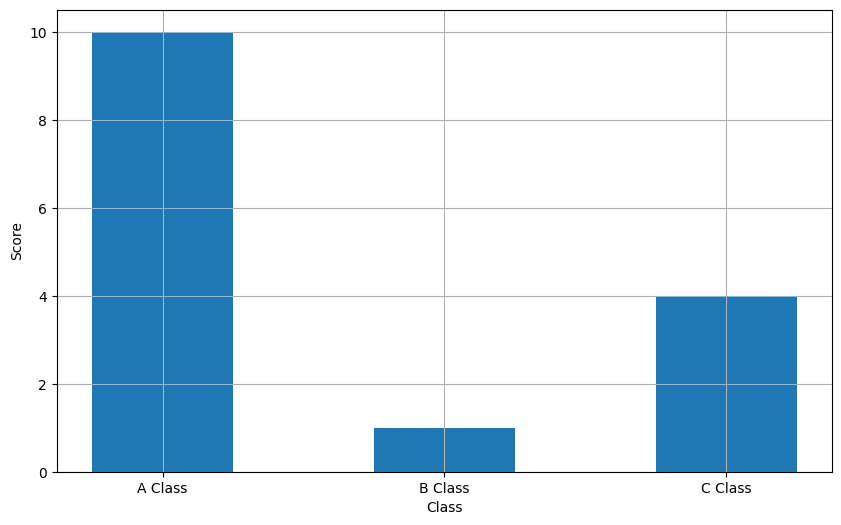

In [ ]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

# グリッドを表示
plt.grid(True)

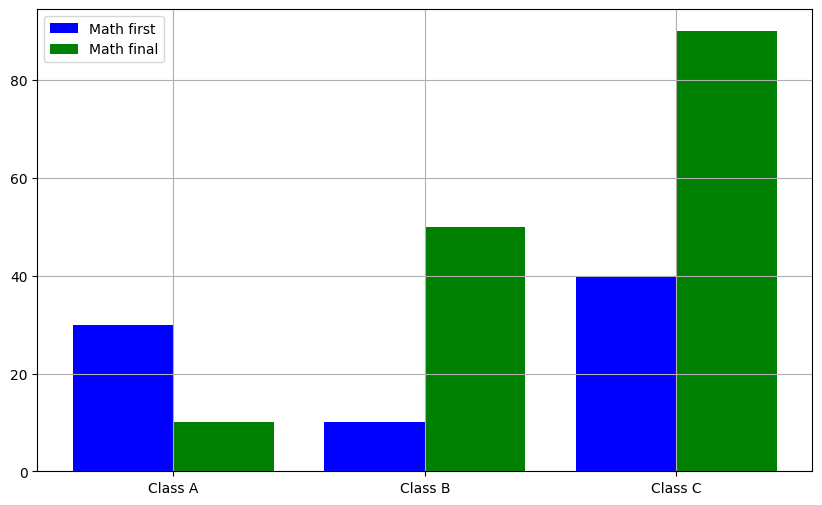

In [ ]:
# データの準備
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

# X軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')# x+wをxにしたら重なる

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

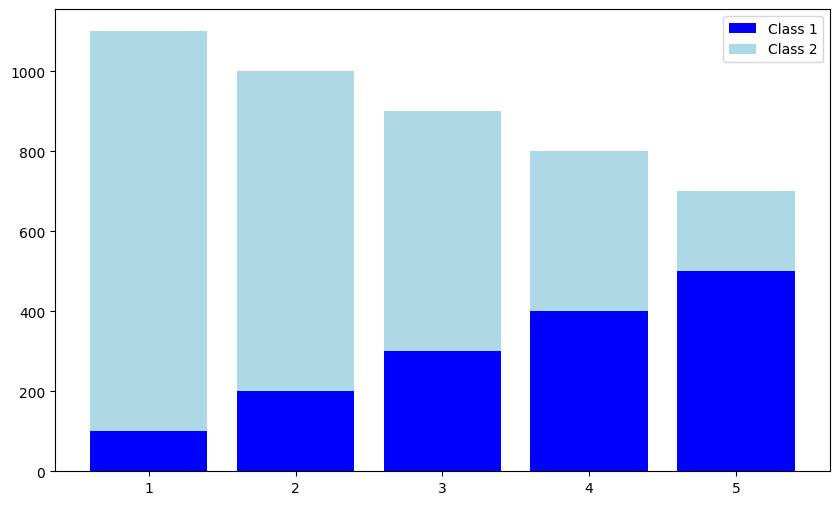

In [ ]:
# データの準備
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# X軸
x = np.array([1, 2, 3, 4, 5])

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 凡例を表示
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

In [ ]:
# 関数のパラメータ
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specific artists can be excluded from the automatic leg

## 円グラフ

In [ ]:
# 何を円グラフで書くか

(-1.1998593997207165,
 1.1047438740833693,
 -1.0999843660947275,
 1.0999992555283205)

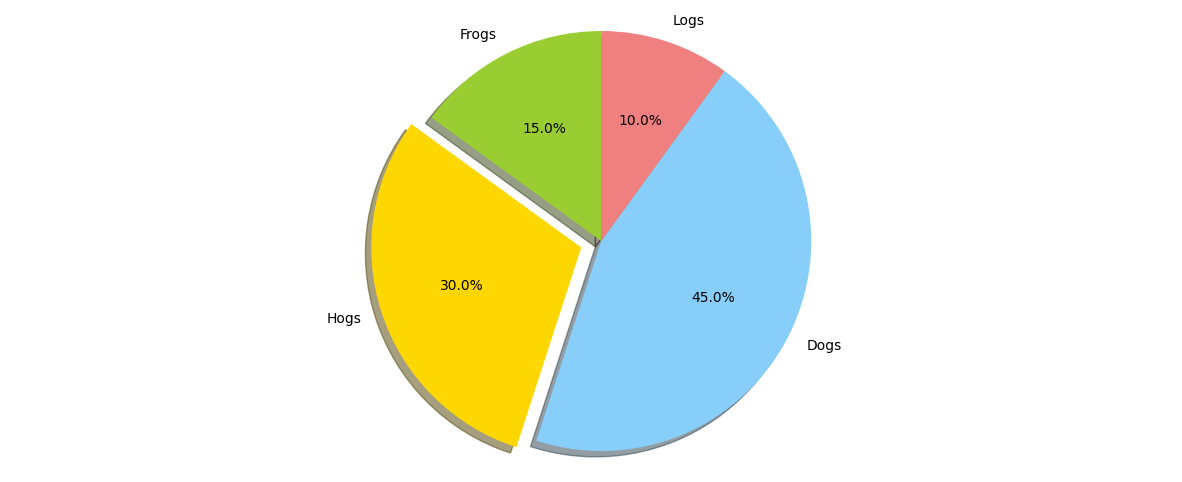

In [ ]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

In [ ]:
# pie関数のパラメータ
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie

## バブルチャート

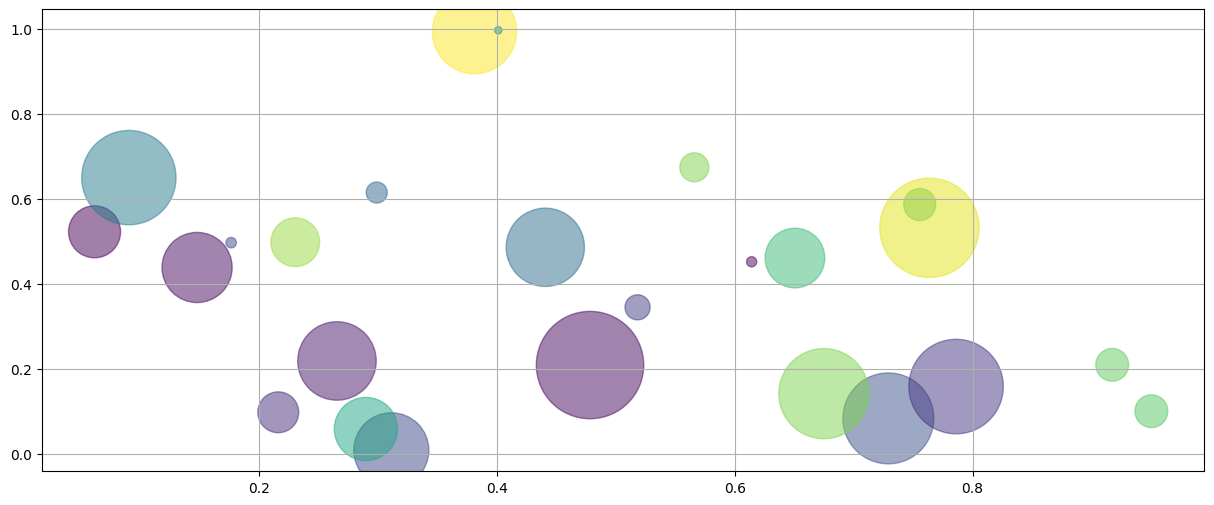

In [ ]:
N = 25

# X,Yデータをランダムに生成
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを描画
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)

In [ ]:
# scatter関数のパラメータ
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

## ランダムウォーク・折れ線グラフ

In [ ]:
# 日付データの設定。freq='T'で1分ごとにデータを生成する
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。１か−１を発生させる
dn = np.random.randint(2, size = len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積積を算出している（1番目の要素 * 2番目の要素 * 3番目の要素 * … と和が累積されていく）
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でリサンプリング。
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする。
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

<Axes: >

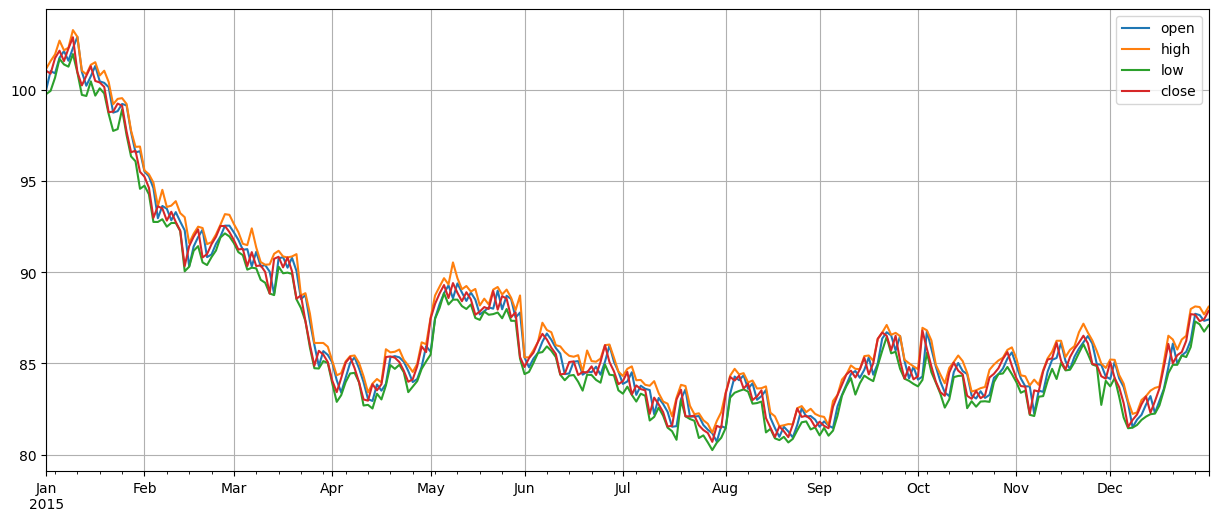

In [ ]:
df.plot(figsize = (15,6), legend = 'best', grid = True)

# 第8章

In [ ]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [ ]:
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

## データ出力

In [ ]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


In [ ]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# それぞれのカラムに ? が何個あるかカウント
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [ ]:
# '?'をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


In [ ]:
print('データ型の確認（型変換前）\n{}\n'.format(auto.dtypes))

データ型の確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object



In [ ]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データ型の確認（型変換後）\n{}'.format(auto.dtypes))

データ型の確認（型変換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


## 相関行列

In [ ]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


## 決定係数・回帰係数・切片

In [ ]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

ValueError: ignored

## データの情報

In [ ]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns =['age','workclass','fnlwgt','education','education-num','marital-status',
                             'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                             'native-country','flg-50K']


# データの形式と欠損数を出力
print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head()

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

## データの置き換え

In [ ]:
# 「fin_flg」カラムを追加し、もし「flg-50K」カラムの値が「>50K」だったら1、そうでなければ0をセットする
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

## ロジスティック回帰

In [ ]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

In [ ]:
# https://www.salesanalytics.co.jp/column/no00107/

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数の設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.797
正解率(test):0.798


In [ ]:
vars(model)

{'penalty': 'l2',
 'dual': False,
 'tol': 0.000,
 'C': 1.000,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss'],
       dtype=object),
 'n_features_in_': 5,
 'classes_': array([0, 1]),
 'n_iter_': array([46], dtype=int32),
 'coef_': array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]]),
 'intercept_': array([-0.001])}

In [ ]:
import re

for line in model:
    if re.search(r'fit', line):
        print("exist")

TypeError: ignored

## ?

In [ ]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [ ]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

## ロジスティック回帰+標準化処理

In [ ]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Xとyを設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train_std,y_train)

# 正解率の表示
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


In [ ]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


## リッジ回帰

In [ ]:
# リッジ回帰用のクラス
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築と評価
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train,y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_train,y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

NameError: ignored

## mushroom

In [ ]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
mushroom.columns =['classes','cap_shape','cap_surface','cap_color','bruises','odor',
                             'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                             'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                             'ring_number','ring_type','spore_print_color','population','habitat']

# 先頭5行を表示
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [ ]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


## get_dummies(????)

In [ ]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## フラグ化

In [ ]:
# 目的変数もフラグ化（0/1化）する
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

## 合計を数える(表にして表示)

In [ ]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [ ]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


## エントロピー

今回の例ではカテゴリは2つ（毒キノコか否か）で、毒キノコでない割合が$p1$、毒キノコである割合が$p2$となります。ここで1つ目の例として、ある分岐条件によって毒キノコも食用キノコも等しい割合で入っている状態を考えます。$p1=p2=0.5$となるので、エントロピーは上の式から以下のように計算できます。なお、底が2のログ関数（`np.log2`）を使っています。

In [ ]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

In [ ]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) *  np.log2(1 - p) )

## グラフ(0.01刻みで)

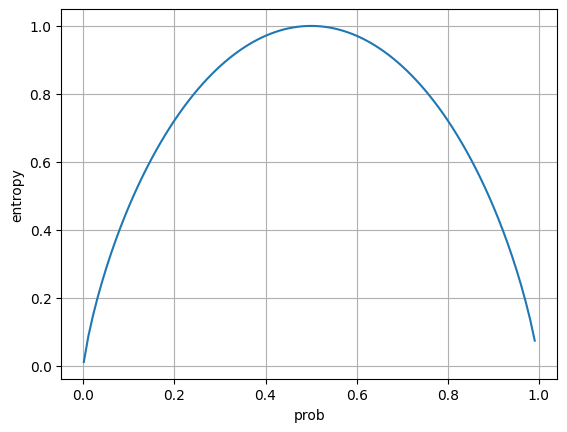

In [ ]:
# pの値を0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001, 0.999, 0.01)

# グラフ化
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [ ]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

## エントロピーの出力色々

In [ ]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピーの初期値: {:.3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値: 0.999


In [ ]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [ ]:
# cap_colorがcでない場合のエントロピー
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [ ]:
# cap_colorがcである場合のエントロピー
p1 = 32/(32+12)
p2 = 1 - p1
entropy_c1 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


In [ ]:
entropy_after = (4176+3904)/8124*entropy_c0 + (32+12)/8124*entropy_c1
print('データ分割後の平均エントロピー: {:.3f}'.format(entropy_after))

データ分割後の平均エントロピー: 0.998


In [ ]:
print('変数cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数cap_colorの分割によって得られる情報利得: 0.001


In [ ]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [ ]:
# gill_colorがbでない場合のエントロピー
p1 = 4208/(4208+2188)
p2 = 1 - p1
entropy_b0 = - (p1*np.log2(p1) + p2*np.log2(p2))

# gill_colorがbである場合のエントロピー
p1 = 0/(0+1728)
p2 = 1 - p1
entropy_b1 = - (p2*np.log2(p2))

entropy_after = (4208+2188)/8124*entropy_b0 + (0+1728)/8124*entropy_b1
print('変数gill_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数gill_colorの分割によって得られる情報利得: 0.269


## 決定木

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.991
正解率(test):0.992


In [ ]:
# 参考プログラム
# pydotplusやgraphvizをインストールする必要があります(GoogleColaboratory上ではインストール不要)
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: ignored

## グラフの描画(折れ線グラフ)

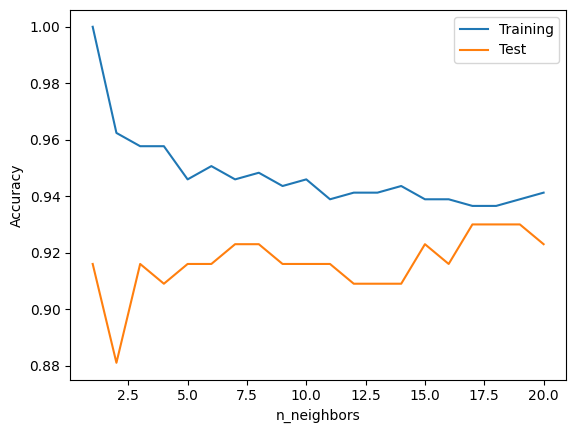

In [ ]:
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy =[]

# 学習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## グラフの読み取りと列の選択

In [ ]:
student = pd.read_csv('CSVファイル/student-mat.csv', sep=';')
X = student.loc[:, ['age','Medu','Fedu','traveltime','studytime'
                              ,'failures','famrel','freetime','goout','Dalc','Walc'
                              ,'absences','G1','G2']].values

FileNotFoundError: ignored

## 正解率の出力

In [ ]:
# SVMのライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.880
正解率(test):0.839


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


# 第9章

In [ ]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

## k-means法

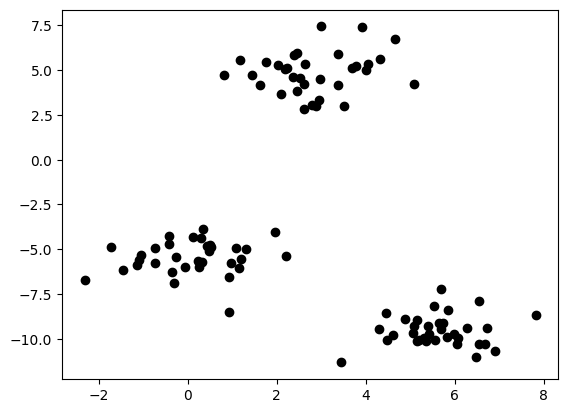

In [ ]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは2つの値を返すため、一方は使用しない「 _ 」で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
# colorのオプションで色付けができる
plt.scatter(X[:,0],X[:,1],color='black')

In [ ]:
# KMeansクラスの初期化
kmeans = KMeans(init='random',n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


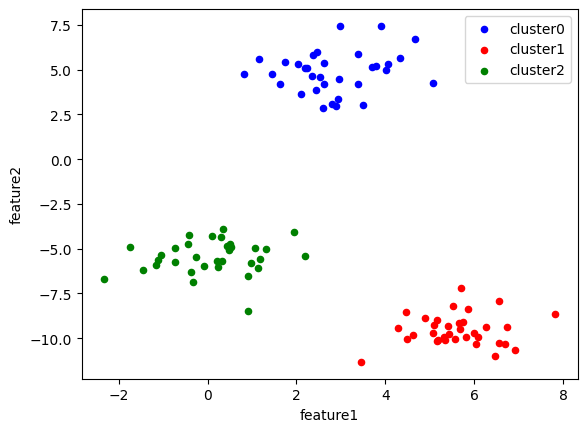

In [ ]:
# concatでデータを横に結合(axis=1を指定)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1','feature2','cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                                           label=f'cluster{i}', ax=ax)

## データの読み取り

In [ ]:
# webからデータを取得したり、zipファイルを扱うためのライブラリをインポート
import requests, zipfile
import io

# データがあるurl の指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
#対象データを読み込み
bank= pd.read_csv('bank-full.csv', sep=';')

# 先頭の5行を表示
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


-Input variables:
- ##### bank client data:
1 - age (numeric)  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown","secondary","primary","tertiary")  
5 - default: has credit in default? (binary: "yes","no")  
6 - balance: average yearly balance, in euros (numeric)    
7 - housing: has housing loan? (binary: "yes","no")  
8 - loan: has personal loan? (binary: "yes","no")   
- ##### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
10 - day: last contact day of the month (numeric)  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
12 - duration: last contact duration, in seconds (numeric)  
- ##### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

-Output variable:
- ##### desired target
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## 欠損データの数

In [ ]:
print('データ形式(X,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データ形式(X,y):(45211, 17)
欠損データの数:0


## 標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)

In [ ]:
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


## 重心→クラスター番号→件数

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    14734
0    24509
2     2684
1      221
5     1683
3     1380
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

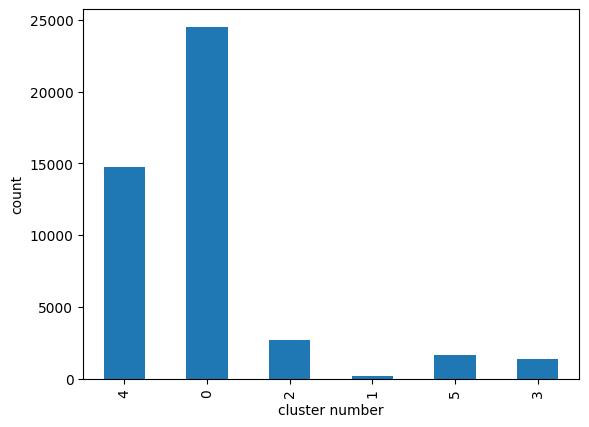

In [ ]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

## エルボー方(クラスター数を_から_に増やして、それぞれの距離の総和を求める)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

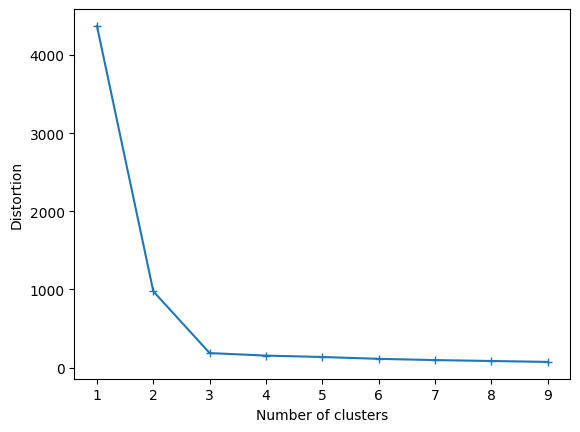

In [ ]:
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

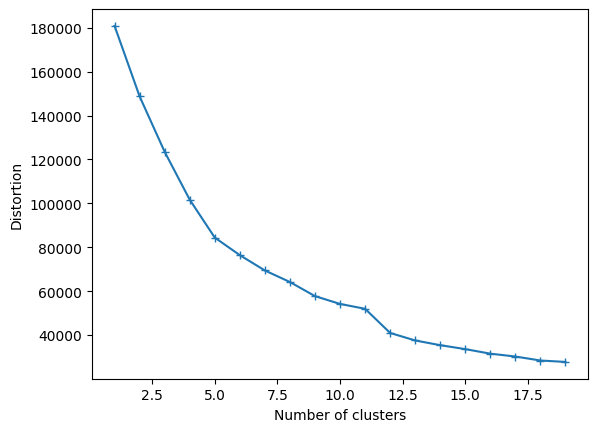

In [ ]:
# エルボー方による推定。クラスター数を1から20に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

## クラスター番号のデータを結合

In [ ]:
# 金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis=1)

# 先頭の5行を表示
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


## クラスタ番号をIndex、年齢層をColumnとする

In [ ]:
# 分割のための区切りを設定
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


## データ数をカウント

In [ ]:
# 分割したデータ数をカウント
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

## ヒートマップ: 色表示

<Axes: xlabel='age', ylabel='cluster_number'>

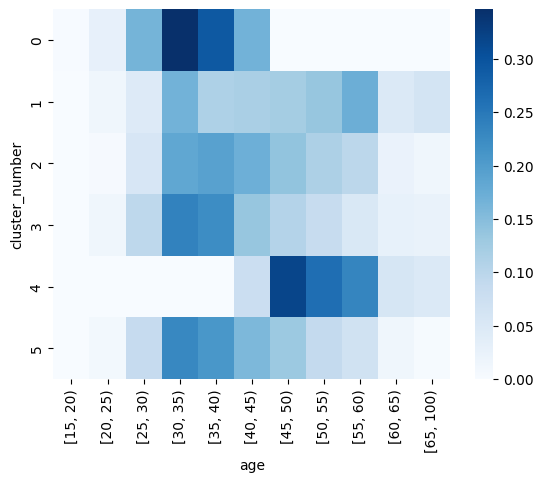

In [ ]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [ ]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<Axes: xlabel='job', ylabel='cluster_number'>

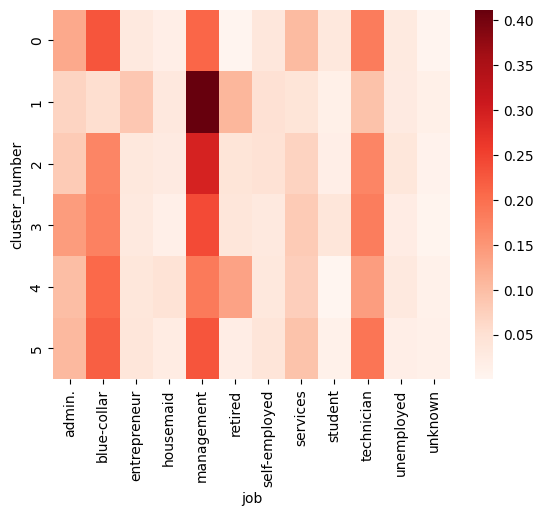

In [ ]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1),cmap='Reds')

## PCA

相関係数0.889:


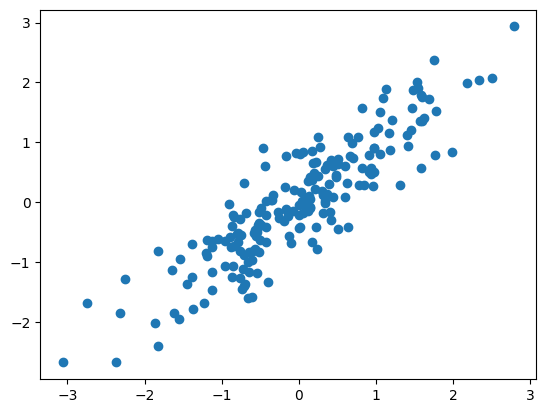

In [ ]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

#２つの乱数を生成
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [ ]:
# インポート
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


### 分散

In [ ]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


### 分散割合

In [ ]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.945 0.055]


## 回帰係数と切片が決まっている2次関数からの距離みたいな

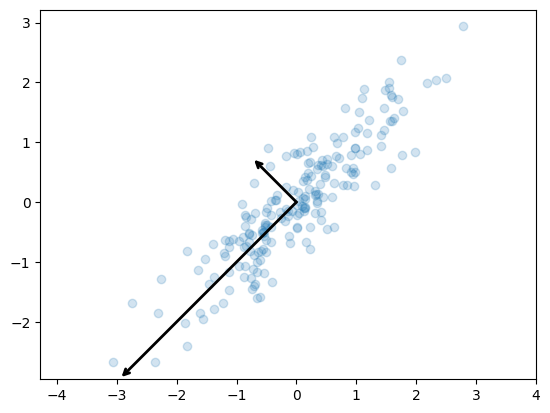

In [ ]:
# パラメータ設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

## 乳がんデータ

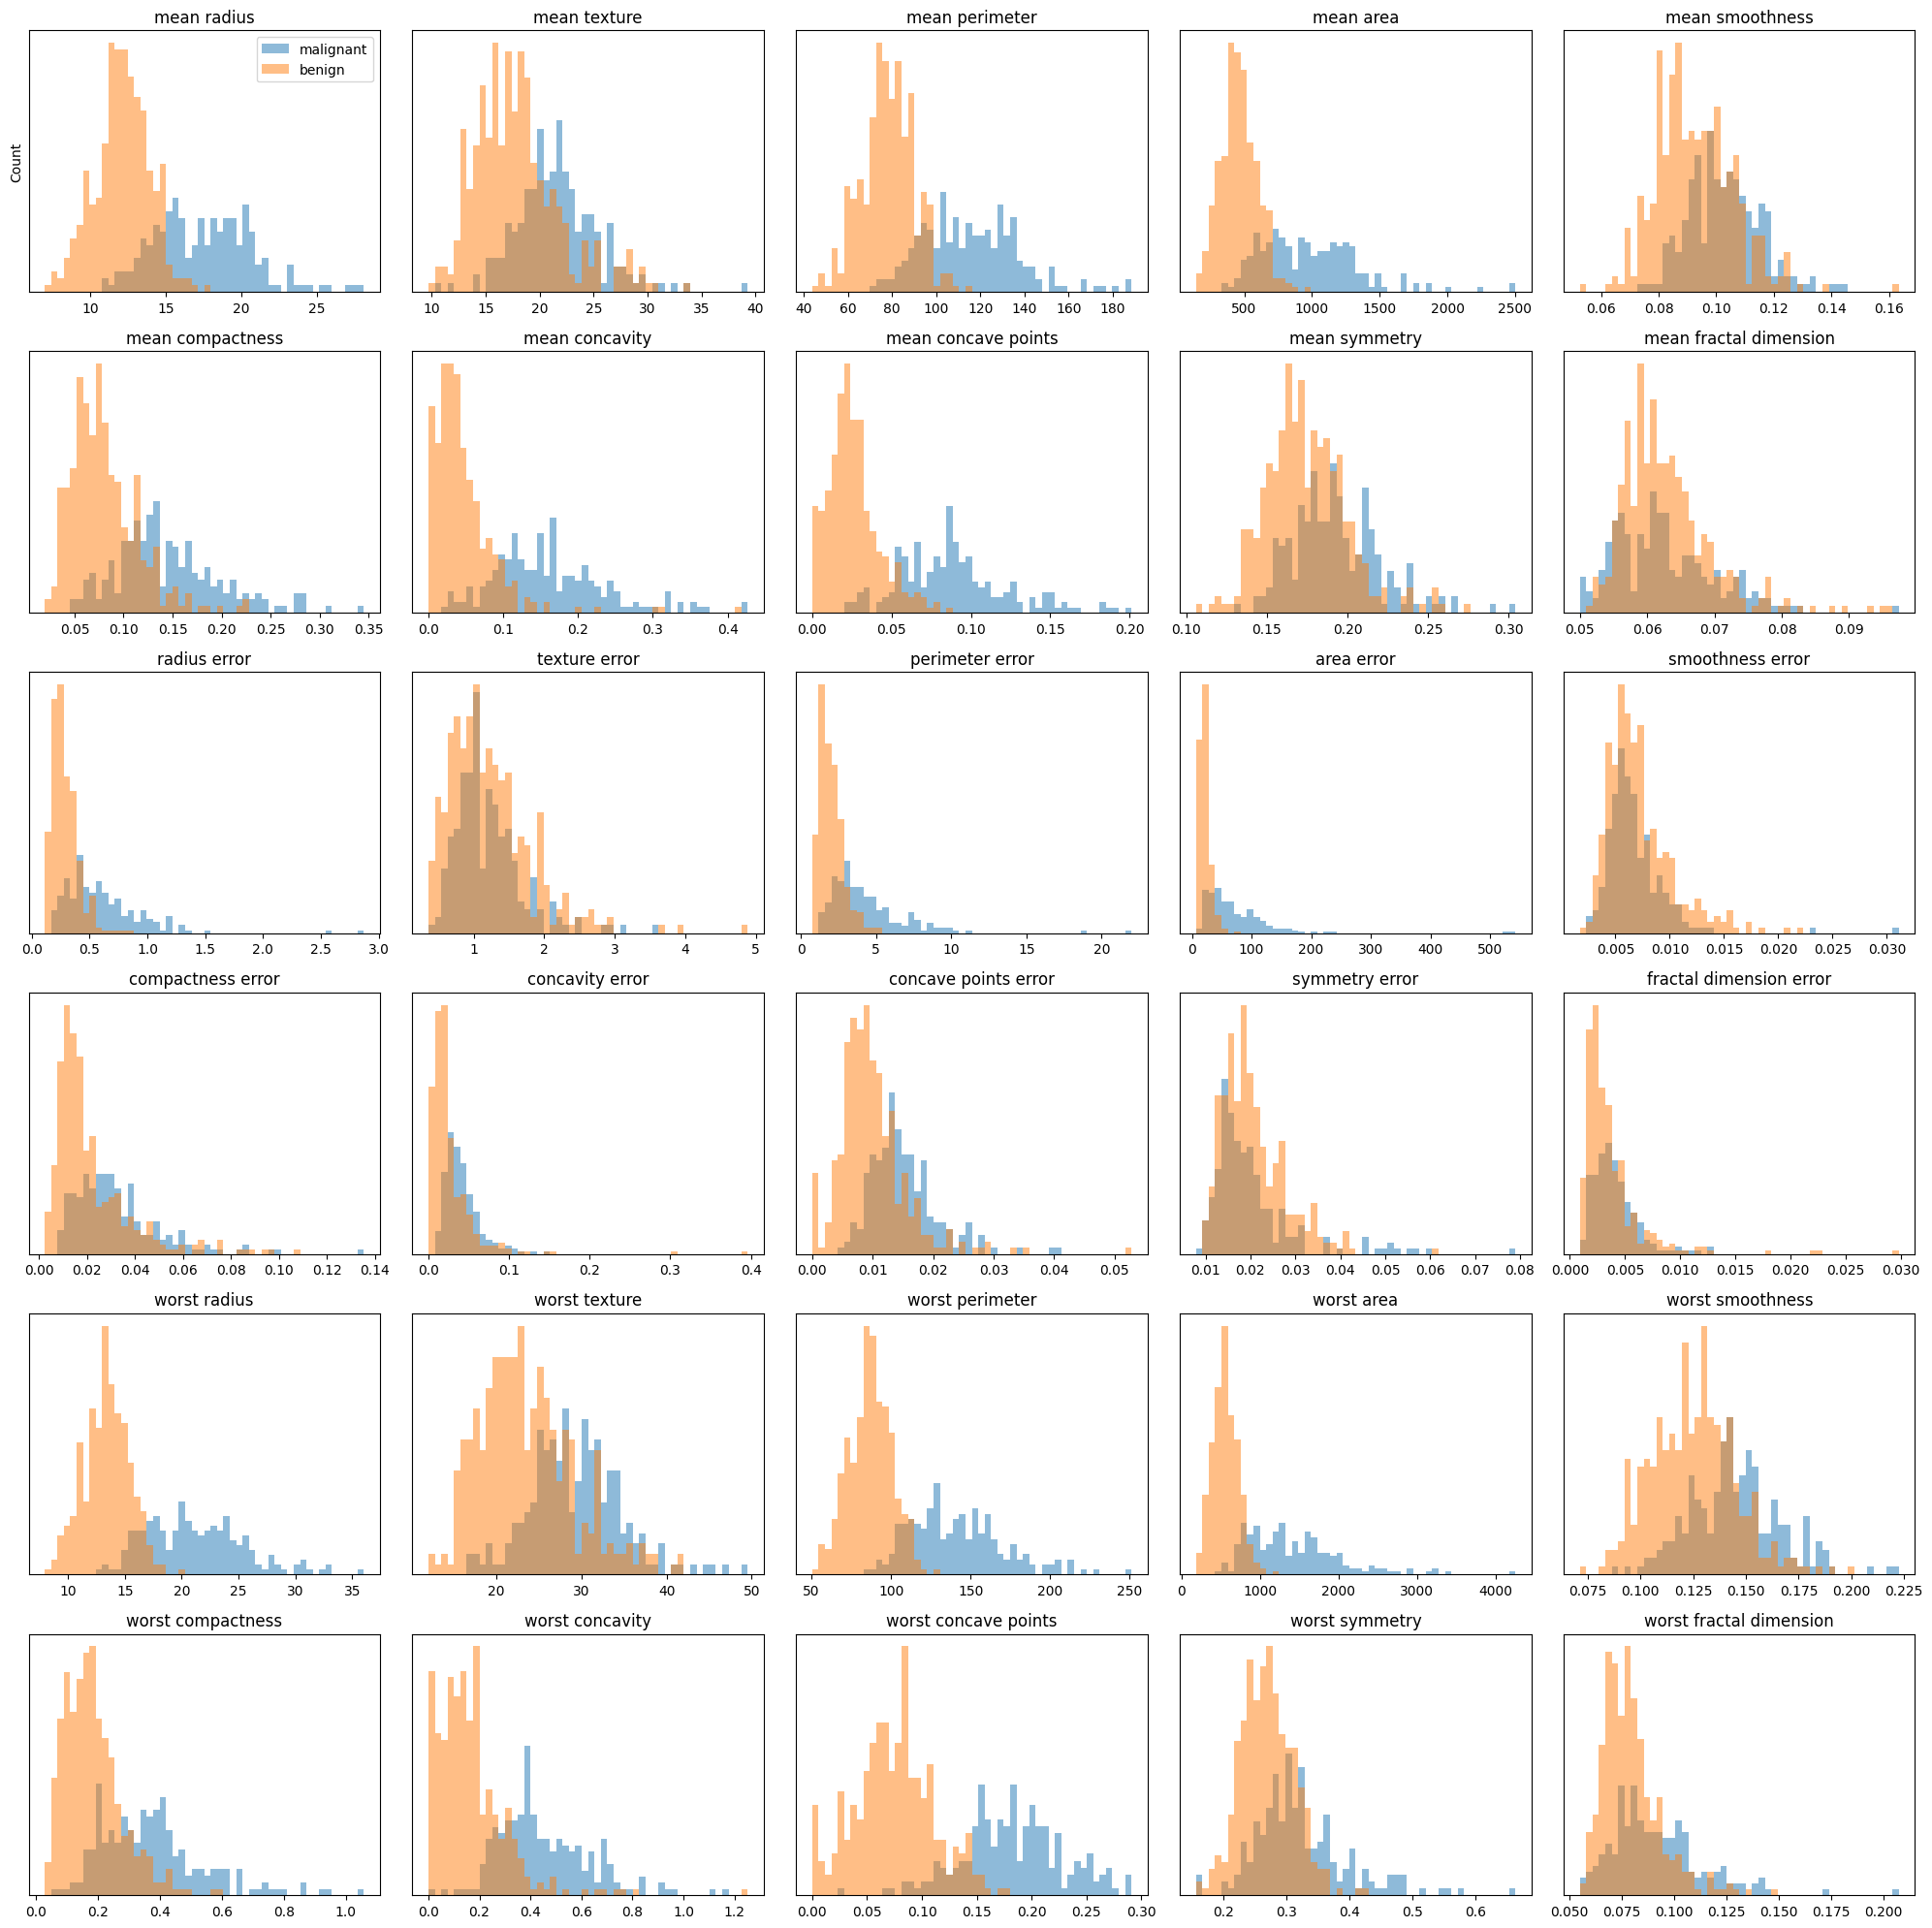

In [ ]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データをmalignant（悪性）かbenign（良性）に分けるためのフィルター処理
# malignant（悪性）はcancer.targetが0
malignant = cancer.data[cancer.target==0]

# benign（良性）はcancer.targetが0
benign = cancer.data[cancer.target==1]

#　malignant（悪性）がブルー、benign（良性）がオレンジのヒストグラム
# 各図は、各々の説明変数（mean radiusなど）と目的変数との関係を示したヒストグラム
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

## 主成分分析

In [ ]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [ ]:
# 列にラベルをつける、1つ目が第1主成分、2つ目が第2主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

# 上のデータに、目的変数（cancer.target）を紐づける、横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

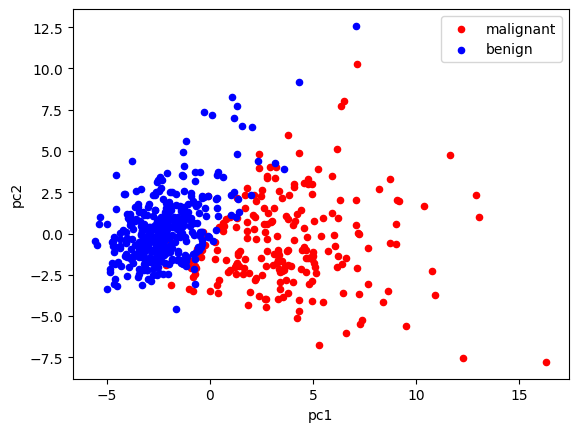

In [ ]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');

# 良性をプロット
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);

## 確信度

In [ ]:
trans = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
trans.head()

FileNotFoundError: ignored

In [ ]:
# InoivceNoの先頭1文字をcancel_flgとして追加
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x:str(x)[0])

# cancel_flgでグルーピングして集計
trans.groupby('cancel_flg').size()

In [ ]:
trans = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]

In [ ]:
# StockCodeごとに件数を数え、上位5件を表示
trans['StockCode'].value_counts().head(5)

In [ ]:
# すべてのInvoiceNoをtrans_allとして抽出
trans_all = set(trans.InvoiceNo)

# 商品85123Aを購入したデータをtrans_aとする
trans_a = set(trans[trans['StockCode']=='85123A'].InvoiceNo)
print(len(trans_a))

# 商品85099Bを購入したデータをtrans_bとする
trans_b = set(trans[trans['StockCode']=='85099B'].InvoiceNo)
print(len(trans_b))

# 商品85123Aおよび85099Bを購入したデータをtrans_abとする
trans_ab = trans_a&trans_b
print(len(trans_ab))

In [ ]:
# trans_ab の、両商品を含むバスケットの数を表示
print('両商品を含むバスケットの数:{}'.format(len(trans_ab)))
print('両商品を含むバスケットの全体に占める割合:{:.3f}'.format(len(trans_ab)/len(trans_all)))

In [ ]:
print('商品85123Aのバスケットの数:{}'.format(len(trans_a)))
print('商品85123Aを含むバスケットの全体に占める割合:{:.3f}'.format(len(trans_a)/len(trans_all)))

In [ ]:
print('確信度:{:.3f}'.format(len(trans_ab)/len(trans_a)))

In [ ]:
print('確信度:{:.3f}'.format(len(trans_ab)/len(trans_b)))

## リスト値

In [ ]:
# 全体のバスケットに占める商品Bの購買率を計算
support_b = len(trans_b) / len(trans_all)

# 商品Aを購買したときの商品Bの購買率を計算
confidence = len(trans_ab) / len(trans_a)

# リスト値を計算
lift = confidence / support_b
print('lift:{:.3f}'.format(lift))

# 第10章

In [ ]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

ホールドアウト法・交差検証法

交差検証法について: k分割交差検証(k-fold法)・1個抜き交差検証(leave-one-out)

汎化性能を高めるための特徴量の扱い方・アルゴリズムが固有に持つパラメータのチューニング方法

特徴量エンジニアリング(feature engineering)や次元削減(dimention reduction)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from skleran.model_selction import cross_val_score

# 乳がんのデータを読み込み
cancer = load_brest_cancer()

# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross valudation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

In [ ]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train X_test, y_train, y_test = train_test_split(
    cancer.data
    ,cancer.target
    ,stratify=cancer.target
    ,random_state=0
    )
# ハイパーパラメータの全ての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3,2,num=6):
  for C in np.logspace(-3,2,num=6):
    svm=SVC(gamma=gamma, C=C)
    svm.fit(X_train,y_train)
    scores[(gamma,C)] = svm.score(X_test,y_test)

# 検証結果をscoresに格納
scores = pd.Series(scores)

# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma,C:{})'.format(scores.idxmax()))


# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())

In [ ]:
# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data
    ,cancer.target
    ,stratify=cancer.target
    ,random_state=0
)

# GridSearchCVクラスに与えるパラメータを表示
param_grid = {
    'C': np.logspace(-3,2,num=6)
    'gamma':np.logspace(-3,2,num=6)
}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5)

# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train, y_train)

# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

In [ ]:
# インポート
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer_target,
    stratify=cancer.target,
    random_state=66
)

# クラスの初期化と学習
model = SVC(gamma=0.001,C=1)
model.fit(X_train,y_train)

# 表示
print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__, model.score(X_test, y_test)))

In [ ]:
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n{}'.format(m))

In [ ]:
accuracy = (m[0,0]+m[1,1])/m.sum()
print('正解率:{:.3f}'.format(accuracy))

In [ ]:
# 適合率の計算
precision = (m[1,1])/m[:,1].sum()

# 再現率の計算
recall = (m[1,1])/m[1,:].sum()

# F1スコアの計算
f1 = 2*(precision*recall)/(precision + recall)

print('適合率:{:.3f}'.format(precision))
print('再現率:{:.3f}'.format(recall))
print('F1値:{:.3f}'.format(f1))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('適合率:{:.3f}'.format(precision_score(y_test,y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test,y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_tset,y_pred)))

In [ ]:
# インポート
from sklearn.linear_model import LogisticRegression

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,cnacer.target,stratify=cancer.target,random_state=66
)

#LogisticRegressionクラスの初期化と学習
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

# テスト用データの予測確率を計算
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

# 先頭の5行を表示
results.head()

In [ ]:
# 良性(benign)クラスの予測確率が0.4, 0.3, 0.15, 0.05以上なら、それぞれの列に1を設定する
for threshold in [0.4, 0.3, 0.15, 0.05]:
  results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)

# 先頭の10行を表示
results.head(10)

In [ ]:
# 閾値を0.01から0.99の間で50通りとして、偽陽性率と真陽性率を計算
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
  labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
  m =